# Task 2: Text Sentiment Analysis

## Step 1: Load the Dataset of IMDB Reviews


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set visualization style
sns.set(style="whitegrid")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df=pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})  # Adjust mapping based on your data
df = df[['review', 'label']].dropna()  # Keep relevant columns, drop missing values

df = df.sample(n=5000, random_state=42) if len(df) > 5000 else df

# Initial exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nLabel Distribution:\n", df['label'].value_counts())

Dataset Shape: (5000, 2)

First 5 Rows:
                                                   review  label
33553  I really liked this Summerslam due to the look...      1
9427   Not many television shows appeal to quite as m...      1
199    The film quickly gets to a major chase scene w...      0
12447  Jane Austen would definitely approve of this o...      1
39489  Expectations were somewhat high for me when I ...      0

Label Distribution:
 label
1    2519
0    2481
Name: count, dtype: int64


# Step 2: Text Preprocessing

In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing
print("Preprocessing texts...")
df['cleaned_text'] = df['review'].apply(preprocess_text)
print("\nSample Preprocessed Text:\n", df[['review', 'cleaned_text']].head())

Preprocessing texts...

Sample Preprocessed Text:
                                                   review  \
33553  I really liked this Summerslam due to the look...   
9427   Not many television shows appeal to quite as m...   
199    The film quickly gets to a major chase scene w...   
12447  Jane Austen would definitely approve of this o...   
39489  Expectations were somewhat high for me when I ...   

                                            cleaned_text  
33553  really liked summerslam due look arena curtain...  
9427   many television show appeal quite many differe...  
199    film quickly get major chase scene ever increa...  
12447  jane austen would definitely approve onebr br ...  
39489  expectation somewhat high went see movie thoug...  


# Step 3: Feature Engineering
* Convert text to TF-IDF features

In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (4000, 5000)
Test Set Shape: (1000, 5000)


# Step 4: Model Training

In [8]:
model = LogisticRegression(max_iter=1000)
print("Training model...")
model.fit(X_train, y_train)

Training model...


LogisticRegression(max_iter=1000)

# Step 5: Model Evaluation


=== Model Evaluation ===
Precision: 0.8093
Recall: 0.8846
F1-Score: 0.8453

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.80      0.83       506
    Positive       0.81      0.88      0.85       494

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lenovo\\Desktop\\internship\\developer hub\\sentiment_analysis\\confusion_matrix.png'

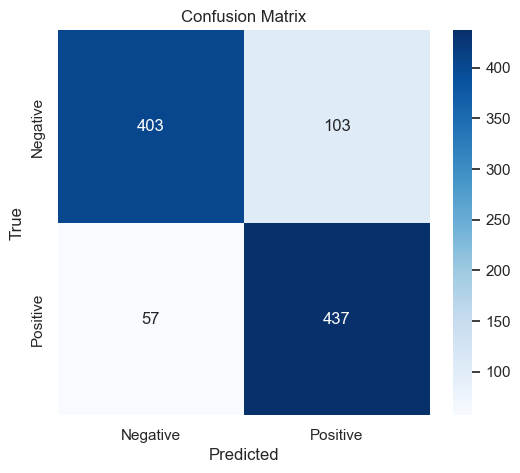

In [9]:
y_pred = model.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== Model Evaluation ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('sentiment_analysis/confusion_matrix.png')  # Save for submission
plt.show()

# Step 6: Example Prediction

In [10]:
def predict_sentiment(text, vectorizer, model):
    cleaned_text = preprocess_text(text)
    X_new = vectorizer.transform([cleaned_text])
    prediction = model.predict(X_new)[0]
    return "Positive" if prediction == 1 else "Negative"

sample_texts = [
    "This movie was absolutely fantastic and thrilling!",
    "I hated this film, it was boring and poorly acted."
]
print("\n=== Sample Predictions ===")
for text in sample_texts:
    sentiment = predict_sentiment(text, vectorizer, model)
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


=== Sample Predictions ===
Text: This movie was absolutely fantastic and thrilling!
Predicted Sentiment: Positive

Text: I hated this film, it was boring and poorly acted.
Predicted Sentiment: Negative

